## 使用Keras实现MLP

### 1.使用顺序API构建图像分类器
Fashion MNIST图像分类

In [1]:
import tensorflow as tf
from tensorflow import keras

# 获取训练集与测试集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 数据集是28*28的阵列
X_train_full.shape

(60000, 28, 28)

In [2]:
# 数据类型为整数（0~255）
X_train_full.dtype

dtype('uint8')

In [3]:
# 从训练集中再次划分训练集与验证集
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [4]:
# 数据集中的数字标签的真实含义
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

可视化一些样本

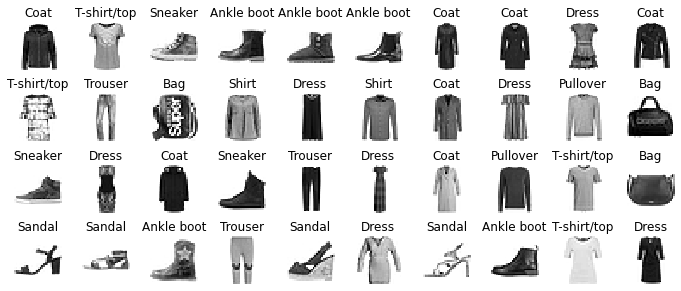

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



#### 1.1 使用顺序API创建模型：具有两个隐藏层的分类MLP

方式一：

In [6]:
# 创建一个Sequential模型。
# 这是用于神经网络的最简单的Keras模型，它仅由顺序连接的单层堆栈组成。这称为顺序API
model = keras.models.Sequential()
# 构建第一层（Flatten层）。其作用是将每个输入图像转换为一维度组：如果接收到输入数据X，则计算X.reshape（-1，1）
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 添加具有300个神经元的Dense隐藏层。它使用ReLU激活函数
model.add(keras.layers.Dense(300, activation="relu"))
# 添加第二个有100个神经元的Dense隐藏层，还是使用ReLU激活函数
model.add(keras.layers.Dense(100, activation="relu"))
# 添加一个包含10个神经元的Dense输出层（每个类一个），使用softmax激活函数（多类分类）
model.add(keras.layers.Dense(10, activation="softmax"))

方式二：

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary() 用来展示模型的所有层，包括：
- 每个层的名称
- 输出形状
- 参数数量

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 使用 model.layers 可以获取各个层的列表
- 通过索引可以获取具体某个层
- 使用get_weights() 和set_weights() 方法访问层的所有参数。对于密集层，这包括连接权重和偏置项
- 参数矩阵的形状取决于输入个数，这就是在Sequential模型中创建第一层时建议指定input_shape的原因
- 如果不指定input_shape也可以，Keras会等到知道输入形状后才真正构建模型，在这之前，所有层都没有权重，也无法执行某些操作（summary、save模型）

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

(784, 300)
[[ 0.03068282 -0.07227654 -0.06333272 ... -0.05694972  0.04870382
  -0.01343421]
 [-0.01952789 -0.00360323  0.02885841 ...  0.04799794  0.07168749
  -0.0684391 ]
 [-0.05732761  0.0628116   0.01750318 ... -0.06954189  0.0522453
  -0.01302187]
 ...
 [ 0.03366268  0.01989364  0.07426025 ... -0.05602907 -0.05964187
  -0.06469905]
 [-0.0535183  -0.01926365 -0.06133901 ... -0.0113305   0.0230388
  -0.00548185]
 [-0.02431627  0.04191361  0.03040907 ...  0.01220223 -0.01561037
   0.06166613]]
(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#### 1.2 指定损失函数和优化器。也可以选择指定在训练和评估期间要计算的其他指标

- sparse_categorical_crossentropy：这里是多类分类，每个样本具有一个稀疏标签，如[0.，0.，0.，1.，0.，0.，0.，0.，0.，0]代表类3。因此使用softmax激活函数，并使用categorical_crossentropy
- sgd：随机梯度下降，学习率默认值为lr=0.01，可使用使用optimizer=keras.optimizers.SGD（lr=???）来设置学习率
-

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### 1.3 训练和评估模型
输入特征（X_train）和目标类（y_train）以及要训练的轮次数传递给它（否则它将默认为1，这绝对不足以收敛为一个好的模型）。我们还传递了一个验证集（这是可选的）。Keras将在每个轮次结束时测量此集合上的损失和其他指标，这对于查看模型的实际效果非常有用。如果训练集的性能好于验证集，则你的模型可能过拟合训练集（或者存在错误，例如训练集和验证集之间的数据不匹配）。

最后一轮，训练集和验证集的准确率分别为0.919、0.891，没有出现明显的过拟合

fit() 方法返回一个History对象，其中包含训练参数（history.params）、经历的轮次列表（history.epoch），最重要的是包含在训练集和验证集（如果有）上的每个轮次结束时测得的损失和额外指标的字典（history.history）

In [12]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7120 - accuracy: 0.7653 - val_loss: 0.5068 - val_accuracy: 0.8280

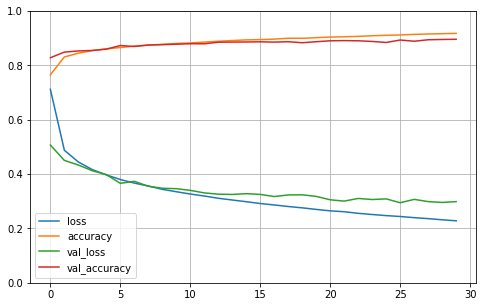

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

- 可以看到训练期间训练准确率和验证准确率都在稳步提高，而训练损失和验证损失则在下降
- 而且，验证曲线与训练曲线很接近，这意味着没有太多的过拟合
- 开始时，验证集上的表现要好于训练集上的表现。但是事实并非如此：确实，验证误差是在每个轮次结束时计算的，而训练误差是使用每个轮次的运行平均值计算的。因此，训练曲线应向左移动半个轮次。如果这样做，你会看到训练和验证曲线在训练开始时几乎完全重叠
- 如果要继续训练，可以再次调用fit() 方法，因为Keras只是从它停止的地方继续训练
- 如果你对模型的性能不满意，则应回头调整超参数（并在更改任何超参数后始终重新调整学习率）:
  1. 首先要检查的是学习率
  2. 尝试使用另一个优化器
  3. 尝试调整模型超参数（例如层数、每层神经元数以及用于每个隐藏层的激活函数的类型）
  4. 尝试调整其他超参数，例如批处理大小（可以使用batch_size参数在fit() 方法中进行设置，默认为32）

#### 1.4 在测试集上评估泛化误差

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 56.4513 - accuracy: 0.8580


[56.45127487182617, 0.8579999804496765]

在测试集上获得比在验证集上略低的性能是很常见的，因为超参数是在验证集而不是测试集上进行调优的（但是在本示例中，我们没有做任何超参数调整，因此较低的精度只是运气不好）。切记不要调整测试集上的超参数，否则你对泛化误差的估计将过于乐观

#### 1.5 对新实例进行预测

In [15]:
X_new = X_test[:3]

# 预测每个类别的概率
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
# 真实类别
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 2. 使用顺序API构建回归MLP
加州的住房房价中位数预测

使用Scikit-Learn的fetch_california_housing（）函数加载数据。该数据集比第2章中使用的数据集更简单，因为它仅包含数字特征（没有ocean_proximity特征），并且没有缺失值。加载数据后，我们将其分为训练集、验证集和测试集，然后比例缩放所有特征

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

构建回归MLP与分类MLP的过程很类似，区别主要在于：
- 输出层只有一个神经元，因为只预测一个单值
- 输出层不适用激活函数，因为输出值的范围为正数
- 损失函数使用均方误差
- 由于数据噪声大，因此隐藏层的神经元会更少

In [18]:
model = keras.models.Sequential([
    # 隐藏层，30个神经元
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    # 输出层，1个神经元
    keras.layers.Dense(1)
])

model.summary()
print(X_train.shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
(11610, 8)


In [19]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 0s 832us/step - loss: 0.8466 - val_loss: 0.5789
Epoch 2/20
363/363 [==============================] - 0s 592us/step - loss: 0.5152 - val_loss: 0.5059
Epoch 3/20
363/363 [==============================] - 0s 562us/step - loss: 0.4857 - val_loss: 0.4794

0.3826068937778473

In [20]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[1.527482 ]
 [2.7157848]
 [2.5598612]]
[0.611 2.205 2.347]


### 3. 使用函数式API构建复杂模型
在构建顺序模型时，可以通过顺序API很方便地实现。对于复杂拓扑结构、多个输入输出的神经网络，可以通过函数式API实现

#### 3.1 Wide&Deep
- 它将部分输入直接连接到输出层，所有输入连入MLP
- 这种架构使神经网络能够学习深度模式（使用深度路径）和简单规则（通过短路径）。相比之下，常规的MLP迫使所有数据流经整个层的堆栈。
因此，数据的简单模式最终可能会因为顺序被转换而失真。

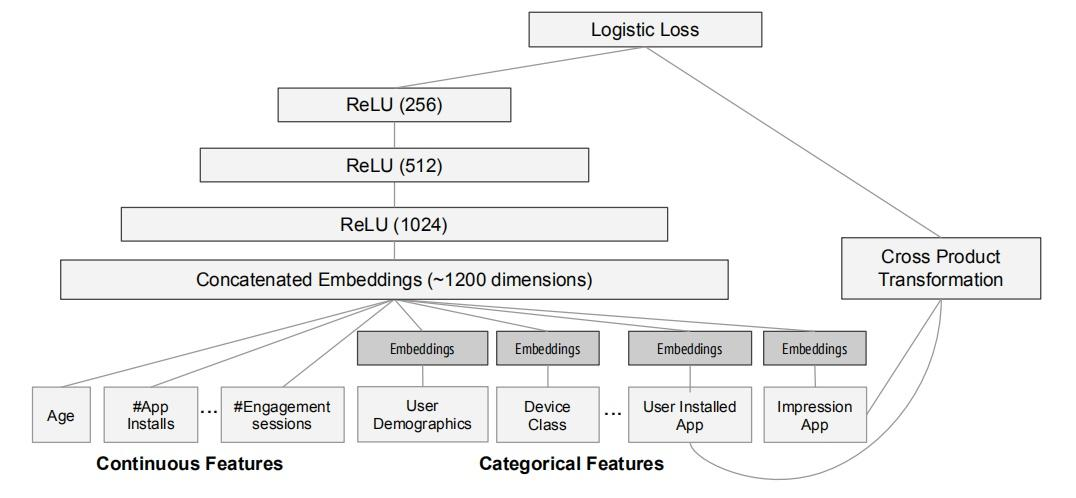

In [21]:
from IPython.display import Image
Image(filename = 'picture/Wide&Deep.jpg')

使用Wide&Deep预测加州房价中位数

通过宽路径送入5个特征（特征0到4），并通过深路径送入6个特征（特征2到7）


#### 3.1.1 构建模型

In [22]:
# 创建一个Input对象。这是模型需要的输入类型的规范，包括其shape、name、dtype
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
# 创建一个包含30个神经元的Dense层，将输入层的输出传递给它
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# 创建第二个隐藏层，将第一个隐藏层的输出传递给它
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 创建一个Concatenate层，用来合并输入和第二个隐藏层的输出
concat = keras.layers.Concatenate()([input_A, hidden2])
# 创建具有单个神经元且没有激活函数的输出层，将合并结果传递给它
output = keras.layers.Dense(1, name='output')(concat)
# 最后，创建一个Keras Model，指定要使用的输入和输出
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

#### 3.1.2 编译模型，指定损失函数和优化器。也可以选择指定在训练和评估期间要计算的其他指标

In [23]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### 3.1.3 训练和评估模型

In [24]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1821 - val_loss: 0.8831
Epoch 2/20
363/363 [==============================] - 0s 669us/step - loss: 0.7934 - val_loss: 0.7047
Epoch 3/20
363/363 [==============================] - 0s 628us/step - loss: 0.6797 - val_loss: 0.6389

0.47319623827934265

In [25]:
y_pred = model.predict((X_new_A, X_new_B))
print(y_test[:3])
print(y_pred)


[0.611 2.205 2.347]
[[1.5430518]
 [2.8035207]
 [2.5136712]]


### 3.2 多个输入多个输出
多输出的场景通常用于基于同一数据的多个独立任务：
- 想在图片中定位和分类主要物体。这既是回归任务（查找物体中心的坐标以及宽度和高度），又是分类任务
- 对面部图片执行多任务分类，使用一个输出对人的面部表情进行分类（微笑、惊讶等），使用另一个输出来识别他们是否戴着眼镜
- 希望在神经网络结构中添加一些辅助输出（见下图），以确保网络的主要部分自己能学习有用的东西，而不依赖于网络的其余部分


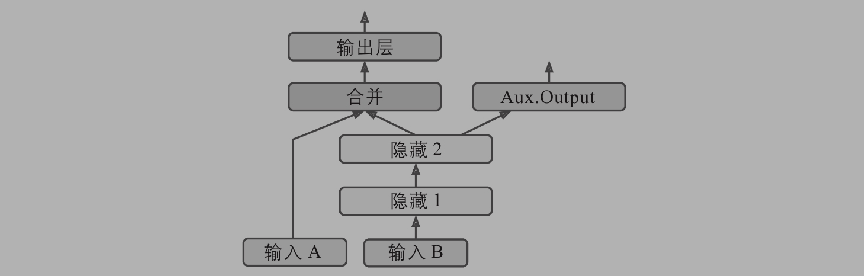

In [26]:
Image(filename = 'picture/multi_output.png')

#### 3.2.1 构建模型

In [27]:
# 创建一个Input对象。这是模型需要的输入类型的规范，包括其shape、name、dtype
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
# 创建一个包含30个神经元的Dense层，将输入层的输出传递给它
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# 创建第二个隐藏层，将第一个隐藏层的输出传递给它
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 创建一个Concatenate层，用来合并输入和第二个隐藏层的输出
concat = keras.layers.Concatenate()([input_A, hidden2])
# 创建具有单个神经元且没有激活函数的输出层，将合并结果传递给它
output = keras.layers.Dense(1, name="main_output")(concat)
# 创建辅助输出层，将第二个隐藏层的输出传递给它
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
# 最后，创建一个Keras Model，指定要使用的输入和输出
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

#### 3.2.2 编译模型，指定损失函数和优化器。也可以选择指定在训练和评估期间要计算的其他指标
每个输出都需要自己的损失函数。因此在编译模型时，应该传递一系列损失（如果传递单个损失，Keras将假定所有输出必须使用相同的损失）。默认情况下，Keras将计算所有这些损失，并将它们简单累加即可得到用于训练的最终损失。我们更关心主要输出而不是辅助输出（因为它仅用于正则化），因此我们要给主要输出的损失更大的权重。幸运的是，可以在编译模型时设置所有的损失权重：

In [28]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

#### 3.2.3 训练和评估模型
训练模型时，需要为每个输出提供标签。在此示例中，主要输出和辅助输出应预测出相同的结果，因此它们应使用相同的标签。除了传递y_train之外，还需要传递（y_train，y_train）（对于y_valid和y_test也是如此）：

In [29]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9815 - main_output_loss: 0.8698 - aux_output_loss: 1.9866 - val_loss: 0.6295 - val_main_output_loss: 0.5546 - val_aux_output_loss: 1.3033
Epoch 2/20
363/363 [==============================] - 0s 755us/step - loss: 0.6010 - main_output_loss: 0.5308 - aux_output_loss: 1.2324 - val_loss: 0.5713 - val_main_output_loss: 0.5136 - val_aux_output_loss: 1.0907

In [30]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

print(total_loss)
print(main_loss)
print(aux_loss)

162/162 [==============================] - 0s 514us/step - loss: 0.3746 - main_output_loss: 0.3615 - aux_output_loss: 0.4931
0.3746423125267029
0.36148273944854736
0.4930785596370697


### 4. 使用子类API构建动态模型
顺序API和函数式API都是声明性的、静态的：
- 首先声明要使用的层以及应该如何连接它们，然后才能开始向模型提供一些数据进行训练或推断
- 可以轻松地保存、克隆和共享模型
- 可以显示和分析它的结构
- 框架可以推断形状和检查类型，因此可以及早发现错误
- 调试容易

子类API构建模型是动态的、命令性的：
- 只需对Model类进行子类化，在构造函数中创建所需的层，然后在 call() 方法中执行所需的计算即可
- 适合模型涉及循环、变化的形状、条件分支和其他动态行为

In [31]:
# 以下模型等效于模型3.2
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        """
        声明了隐藏层和输出层
        """
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        """
        声明了输入层、输出层、隐藏层的连接关系
        """
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

以上动态模型非常类似于函数式API，区别为：
- 不需要创建输入`keras.layers.Input()`，它是`call()`方法的一个参数
- call() 方法中可以执行几乎所有你想做的操作：for循环、if语句、底层TensorFlow操作，等等。这使得它成为研究新想法的研究人员的绝佳API

缺点：
- 模型的架构隐藏在 call() 方法中，因此Keras无法对其进行检查。它无法保存或克隆。当你调用 summary() 方法时，你只会得到一个图层列表，而没有有关它们如何相互连接的信息。而且Keras无法提前检查类型和形状，并且更容易出错。因此，除非你确实需要这种额外的灵活性，否则你应该坚持使用顺序API或函数式API。


### 5. 保存和还原模型
适用于顺序API或函数式API

- 保存模型
```
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")
```

- 加载模型
```
model = keras.models.load_model("my_keras_model.h5")
```

### 6. 在训练中保存检查点
在 fit() 训练过程中定期保存检查点，以免在计算机崩溃时丢失所有内容
1. 在每个轮次结束时保存模型检查点
```
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
```
2. 如果在训练期间使用验证集，则可以在创建ModelCheckpoint时设置save_best_only=True。在这种情况下，只有在验证集上的模型性能达到目前最好时，它才会保存模型。这样，你就不必担心训练时间太长而过拟合训练集：只需还原训练后保存的最后一个模型，这就是验证集中的最佳模型
```
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model
```
3. 提前停止训练：使用EarlyStopping回调。如果在多个轮次（由patience参数定义）的验证集上没有任何进展，它将中断训练，并且回滚到最佳模型
4. 可以将两个回调结合起来以保存模型的检查点（以防计算机崩溃），并在没有更多进展时尽早中断训练（以避免浪费时间和资源）：
```
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
```
5. 自定义回调，可以实现可以实现on_train_begin()、on_train_end()、on_epoch_begin()、on_epoch_end()、on_batch_begin()和on_batch_end()。如果需要的话，在评估和预测期间也可以使用回调（例如用于调试）。为了进行评估，应该实现on_test_begin()、on_test_end()、on_test_batch_begin()或on test_batch_end()（由evaluate()调用），为了进行预测，你应该实现on_predict_begin()、on_predict_end()、on_predict_batch_begin()或on_predict_batch_end()（由predict()调用）
```
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
```

### 7. 使用TensorBoard进行可视化
- 功能：可用于在训练期间查看学习曲线；比较多次运行的学习曲线；可视化计算图；分析训练统计数据；查看由模型生成的图像；把复杂的多维数据投影到3D，自动聚类并进行可视化

#### 7.1 创建日志目录
首先定义用于TensorBoard日志的根日志目录，再加上一个将根据当前日期和时间生成一个子目录的函数，以便每次运行时都不同。你可能希望在日志目录中包含其他信息，例如你正在测试的超参数值，以使你更容易知道在TensorBoard中查看的内容

In [32]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_10_26-14_42_07'

#### 7.2 创建、编译模型


In [33]:
import numpy as np

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#### 7.3 使用TensorBoard()回调，训练模型

In [35]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.9286 - val_loss: 0.7514
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6781 - val_loss: 0.6344

#### 7.4 启动TensorBoard服务器
在启动时要指定日志文件目录

```
(my_handson-ml2) C:\Users\wangbo>tensorboard --logdir C:\Users\wangbo\PycharmProjects\my_handson-ml2\my_logs
...
TensorBoard 2.7.0 at http://localhost:6006/ (Press CTRL+C to quit)
```

这个时候已经可以查看训练曲线了，为了比较，采用更大的学习率0.05再次训练模型

#### 7.5 采用不同学习率再次训练模型

In [36]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_10_26-14_42_15'

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [39]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 904us/step - loss: 1.9692 - val_loss: 0.5066
Epoch 2/30
363/363 [==============================] - 0s 573us/step - loss: 0.4967 - val_loss: 0.4236
Epoch 3/30
363/363 [==============================] - 0s 584us/step - loss: 0.4171 - val_loss: 0.4017

查看两次训练的训练集损失，发现学习率为0.05时下降得更快

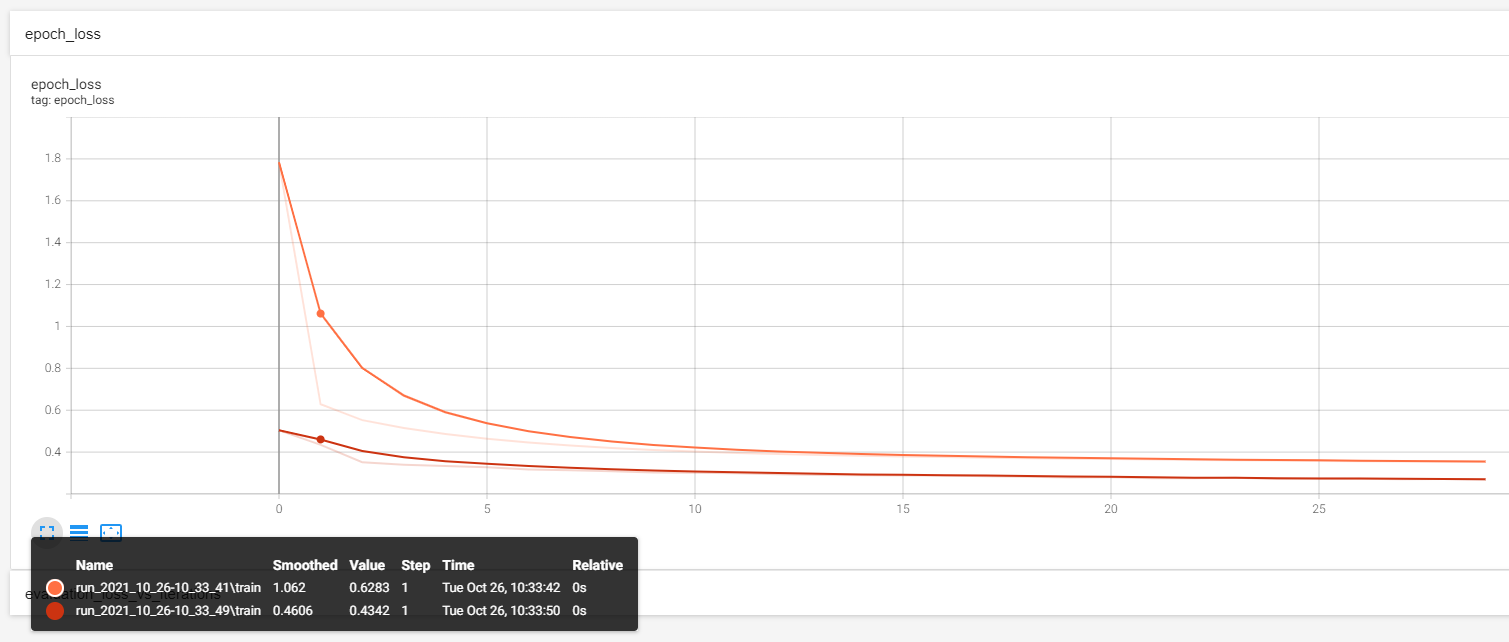

In [40]:
Image(filename = 'picture/tensorboard_picture1.png')

#### tf.summary.create_file_writer
该函数用作上下文来记录标量、直方图、图像、音频和文本，然后可以使用TensorBoard将其可视化

In [41]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

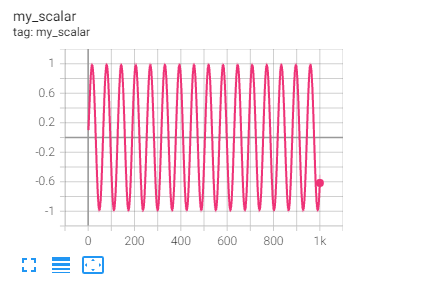

In [42]:
Image(filename = 'picture/create_file_writer.png')

### 8. 微调神经网络超参数
超参数包括：
- 隐藏层数量：
    - 较低的隐藏层对低层结构（例如形状和方向不同的线段）建模，中间的隐藏层组合这些低层结构，对中间层结构（例如正方形、圆形）进行建模，而最高的隐藏层和输出层将这些中间结构组合起来，对高层结构（例如人脸）进行建模。
    - 重用低层的参数可以进行迁移学习其他机器学习问题
- 每个隐藏层神经元数量。
    - 输入层和输出层中神经元的数量取决于任务所需的输入类型和输出类型；
    - 隐藏层神经元通常将调整大小以形成金字塔状，每一层的神经元越来越少，理由是许多低层特征可以合并成更少的高层特征
    - 现在发现在所有隐藏层中使用相同数量的神经元表现一样很好，所以只需要调整一个超参数，而不是每层一个
    - 在实践中，选择一个比你实际需要的层和神经元更多的模型，然后使用提前停止和其他正则化技术来防止模型过拟合，通常更简单、更有效
- 学习率、批量大小、优化器、激活函数、迭代次数
    - 批量大小一般不超过32
    - 隐藏层一般使用ReLU激活函数
    - 在大多数情况下，实际上不需要调整训练迭代次数，只需使用提前停止即可

#### 8.1 交叉验证
使用各种超参数的组合，看看哪种对验证集最有效（或使用k折交叉验证）

1. 创建一个函数，该函数将在给定一组超参数的情况下构建并编译Keras模型：

In [43]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

2. 基于 build_model() 函数创建一个KerasRegressor：

In [44]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

3. 可以像常规Scikit-Learn回归器一样使用该对象：可以使用其fit()方法进行训练，使用随机搜索探索隐藏层的数量、神经元的数量和学习率：

注意：
   - fit() 函数中传入的参数跟Keras模型的 `model.fit()` 传入的参数一致
   - RandomizedSearchCV使用K折交叉验证，`validation_data=(X_valid, y_valid)`仅用于提前停止

In [45]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/242 [..............................] - ETA: 38s - loss: 5.1586

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 2ms/step - loss: 1.7802 - val_loss: 0.7383
Epoch 2/100
242/242 [==============================] - 0s 608us/step - loss: 0.7317 - val_loss: 0.6408
Epoch 3/100
242/242 [==============================] - 0s 675us/step - loss: 0.9424 - val_loss: 0.7286
Epoch 4/100
242/242 [==============================] - 0s 633us/step - loss: 1.5906 - val_loss: 0.8219

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 852us/step - loss: 2.1735 - val_loss: 0.6601
Epoch 2/100
242/242 [==============================] - 0s 592us/step - loss: 1.1442 - val_loss: 0.5778
Epoch 3/100
242/242 [==============================] - 0s 650us/step - loss: 1.0624 - val_loss: 0.6120
Epoch 4/100
242/242 [==============================] - 0s 592us/step - loss: 0.7066 - val_loss: 0.5744
Epoch 5/100
242/242 [==============================] - 0s 596us/step - loss: 1.1283 - val_loss: 0.5942

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 807us/step - loss: 1.9294 - val_loss: 0.6338
Epoch 2/100
242/242 [==============================] - 0s 641us/step - loss: 0.6002 - val_loss: 0.5623
Epoch 3/100
242/242 [==============================] - 0s 571us/step - loss: 0.5640 - val_loss: 0.5521
Epoch 4/100
242/242 [==============================] - 0s 579us/step - loss: 0.5537 - val_loss: 0.5451
Epoch 5/100
242/242 [==============================] - 0s 641us/step - loss: 0.5482 - val_loss: 0.5410

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 898us/step - loss: 5.5395 - val_loss: 3.9461
Epoch 2/100
242/242 [==============================] - 0s 588us/step - loss: 3.2964 - val_loss: 2.5136
Epoch 3/100
242/242 [==============================] - 0s 604us/step - loss: 2.1427 - val_loss: 1.7360
Epoch 4/100
242/242 [==============================] - 0s 588us/step - loss: 1.5193 - val_loss: 1.3003
Epoch 5/100
242/242 [==============================] - 0s 600us/step - loss: 1.1698 - val_loss: 1.0497
Epoch 6/100
242/242 [===============

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 894us/step - loss: 6.5812 - val_loss: 4.5991
Epoch 2/100
242/242 [==============================] - 0s 596us/step - loss: 4.0132 - val_loss: 2.9277
Epoch 3/100
242/242 [==============================] - 0s 583us/step - loss: 2.5919 - val_loss: 1.9766
Epoch 4/100
242/242 [==============================] - 0s 575us/step - loss: 1.7894 - val_loss: 1.4298
Epoch 5/100
242/242 [==============================] - 0s 654us/step - loss: 1.3298 - val_loss: 1.1141

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 898us/step - loss: 5.5261 - val_loss: 4.1469
Epoch 2/100
242/242 [==============================] - 0s 600us/step - loss: 3.5883 - val_loss: 2.7332
Epoch 3/100
242/242 [==============================] - 0s 579us/step - loss: 2.4364 - val_loss: 1.8971
Epoch 4/100
242/242 [==============================] - 0s 683us/step - loss: 1.7473 - val_loss: 1.3999
Epoch 5/100
242/242 [===========================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.9233 - val_loss: 1.2501
Epoch 2/100
242/242 [==============================] - 0s 666us/step - loss: 1.1153 - val_loss: 0.8201
Epoch 3/100
242/242 [==============================] - 0s 670us/step - loss: 0.7603 - val_loss: 0.7329
Epoch 4/100
242/242 [==============================] - 0s 716us/step - loss: 0.6984 - val_loss: 0.6992

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 906us/step - loss: 2.7477 - val_loss: 1.0522
Epoch 2/100
242/242 [==============================] - 0s 629us/step - loss: 0.9768 - val_loss: 0.7796
Epoch 3/100
242/242 [==============================] - 0s 670us/step - loss: 0.7634 - val_loss: 0.7234
Epoch 4/100
242/242 [==============================] - 0s 608us/step - loss: 0.7134 - val_loss: 0.6924
Epoch 5/100
242/242 [===========================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 923us/step - loss: 2.6872 - val_loss: 1.2264
Epoch 2/100
242/242 [==============================] - 0s 617us/step - loss: 1.0133 - val_loss: 0.7988
Epoch 3/100
242/242 [==============================] - 0s 596us/step - loss: 0.7779 - val_loss: 0.7149
Epoch 4/100
242/242 [==============================] - 0s 675us/step - loss: 0.7111 - val_loss: 0.6801
Epoch 5/100
242/242 [===========================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 877us/step - loss: 1.8265 - val_loss: 1.4425
Epoch 2/100
242/242 [==============================] - 0s 575us/step - loss: 14.4446 - val_loss: 28.1647
Epoch 3/100
242/242 [==============================] - 0s 571us/step - loss: 382.2340 - val_loss: 785.1925
Epoch 4/100
242/242 [==============================] - 0s 575us/step - loss: 10096.9590 - val_loss: 23394.6445
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 319818.3125 - val_loss: 669904.5625

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.6067 - val_loss: 0.5663
Epoch 2/100
242/242 [==============================] - 0s 637us/step - loss: 0.6229 - val_loss: 0.5520
Epoch 3/100
242/242 [==============================] - 0s 675us/step - loss: 0.5884 - val_loss: 0.5650
Epoch 4/100
242/242 [==============================] - 0s 910us/step - loss: 0.5390 - val_loss: 0.5386

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 865us/step - loss: 1.3552 - val_loss: 0.5665
Epoch 2/100
242/242 [==============================] - 0s 600us/step - loss: 0.5651 - val_loss: 0.5500
Epoch 3/100
242/242 [==============================] - 0s 666us/step - loss: 0.5505 - val_loss: 0.5414
Epoch 4/100
242/242 [==============================] - 0s 575us/step - loss: 0.5419 - val_loss: 0.5355
Epoch 5/100
242/242 [==============================] - 0s 621us/step - loss: 0.5410 - val_loss: 0.5352

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 881us/step - loss: 3.4257 - val_loss: 1.0202
Epoch 2/100
242/242 [==============================] - 0s 658us/step - loss: 0.8631 - val_loss: 0.5877
Epoch 3/100
242/242 [==============================] - 0s 608us/step - loss: 0.5748 - val_loss: 0.5405
Epoch 4/100
242/242 [==============================] - 0s 666us/step - loss: 0.5405 - val_loss: 0.5412
Epoch 5/100
242/242 [==============================] - 0s 600us/step - loss: 0.5330 - val_loss: 0.5366

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 989us/step - loss: 3.0525 - val_loss: 1.2899
Epoch 2/100
242/242 [==============================] - 0s 604us/step - loss: 1.0522 - val_loss: 0.8293
Epoch 3/100
242/242 [==============================] - 0s 815us/step - loss: 0.7878 - val_loss: 0.7523
Epoch 4/100
242/242 [==============================] - 0s 621us/step - loss: 0.7267 - val_loss: 0.7161
Epoch 5/100
242/242 [===========================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 919us/step - loss: 3.3937 - val_loss: 1.3294
Epoch 2/100
242/242 [==============================] - 0s 712us/step - loss: 1.0080 - val_loss: 0.7740
Epoch 3/100
242/242 [==============================] - 0s 583us/step - loss: 0.7502 - val_loss: 0.6977
Epoch 4/100
242/242 [==============================] - 0s 761us/step - loss: 0.6952 - val_loss: 0.6674
Epoch 5/100
242/242 [==============================] - 0s 575us/step - loss: 0.6665 - val_loss: 0.6451

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 927us/step - loss: 1.6834 - val_loss: 3.2914
Epoch 2/100
242/242 [==============================] - 0s 712us/step - loss: 48.1278 - val_loss: 157.9158
Epoch 3/100
242/242 [==============================] - 0s 637us/step - loss: 2393.4448 - val_loss: 8396.5068
Epoch 4/100
242/242 [==============================] - 0s 588us/step - loss: 108506.2500 - val_loss: 453672.9375

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 4.8441 - val_loss: 0.8549
Epoch 2/100
242/242 [==============================] - 0s 972us/step - loss: 31.6534 - val_loss: 2.5508
Epoch 3/100
242/242 [==============================] - 0s 770us/step - loss: 273.9747 - val_loss: 19.2483
Epoch 4/100
242/242 [==============================] - 0s 621us/step - loss: 76.4211 - val_loss: 160.8196

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 886us/step - loss: 0.9964 - val_loss: 0.5577
Epoch 2/100
242/242 [==============================] - 0s 704us/step - loss: 0.5527 - val_loss: 0.5412
Epoch 3/100
242/242 [==============================] - 0s 675us/step - loss: 0.5475 - val_loss: 0.5409
Epoch 4/100
242/242 [==============================] - 0s 596us/step - loss: 0.5389 - val_loss: 0.5345
Epoch 5/100
242/242 [==============================] - 0s 658us/step - loss: 0.5425 - val_loss: 0.5380

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.9298 - val_loss: 1.5110
Epoch 2/100
242/242 [==============================] - 0s 666us/step - loss: 1.3495 - val_loss: 0.9631
Epoch 3/100
242/242 [==============================] - 0s 749us/step - loss: 0.9279 - val_loss: 0.8302
Epoch 4/100
242/242 [==============================] - 0s 766us/step - loss: 0.8001 - val_loss: 0.7725

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 923us/step - loss: 3.6396 - val_loss: 1.9952
Epoch 2/100
242/242 [==============================] - 0s 720us/step - loss: 1.6966 - val_loss: 1.1190
Epoch 3/100
242/242 [==============================] - 0s 666us/step - loss: 1.0590 - val_loss: 0.8637
Epoch 4/100
242/242 [==============================] - 0s 704us/step - loss: 0.8379 - val_loss: 0.7653

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 3.3119 - val_loss: 1.7168
Epoch 2/100
242/242 [==============================] - 0s 737us/step - loss: 1.2744 - val_loss: 0.9133
Epoch 3/100
242/242 [==============================] - 0s 679us/step - loss: 0.8916 - val_loss: 0.7803
Epoch 4/100
242/242 [==============================] - 0s 712us/step - loss: 0.7906 - val_loss: 0.7295

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 865us/step - loss: 0.9289 - val_loss: 1.0211
Epoch 2/100
242/242 [==============================] - 0s 683us/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 621us/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 617us/step - loss: nan - val_loss: nan
Epoch 

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 869us/step - loss: 2.6667 - val_loss: 0.6106
Epoch 2/100
242/242 [==============================] - 0s 687us/step - loss: 0.5369 - val_loss: 0.5115
Epoch 3/100
242/242 [==============================] - 0s 745us/step - loss: 0.4774 - val_loss: 0.4738
Epoch 4/100
242/242 [==============================] - 0s 687us/step - loss: 0.4544 - val_loss: 0.4568

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 910us/step - loss: 0.9162 - val_loss: 0.5968
Epoch 2/100
242/242 [==============================] - 0s 699us/step - loss: 0.5512 - val_loss: 0.5169
Epoch 3/100
242/242 [==============================] - 0s 621us/step - loss: 0.4999 - val_loss: 0.4909
Epoch 4/100
242/242 [==============================] - 0s 670us/step - loss: 0.4753 - val_loss: 0.4787

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 815us/step - loss: 1.9293 - val_loss: 0.9508
Epoch 2/100
242/242 [==============================] - 0s 795us/step - loss: 4.5653 - val_loss: 3.9633
Epoch 3/100
242/242 [==============================] - 0s 832us/step - loss: 49.1172 - val_loss: 42.8330
Epoch 4/100
242/242 [==============================] - 0s 716us/step - loss: 525.4430 - val_loss: 489.3417
Epoch 5/100
242/242 [======================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 836us/step - loss: 1.4541 - val_loss: 0.6223
Epoch 2/100
242/242 [==============================] - 0s 567us/step - loss: 0.6833 - val_loss: 0.5995
Epoch 3/100
242/242 [==============================] - 0s 724us/step - loss: 0.6670 - val_loss: 0.6022
Epoch 4/100
242/242 [==============================] - 0s 612us/step - loss: 0.5796 - val_loss: 0.5672
Epoch 5/100
242/242 [==============================] - 0s 596us/step - loss: 0.5795 - val_loss: 0.5515

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.5252 - val_loss: 0.6291
Epoch 2/100
242/242 [==============================] - 0s 881us/step - loss: 0.6218 - val_loss: 0.5911
Epoch 3/100
242/242 [==============================] - 0s 778us/step - loss: 0.5882 - val_loss: 0.5682
Epoch 4/100
242/242 [==============================] - 0s 621us/step - loss: 0.5676 - val_loss: 0.5529

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 848us/step - loss: 1.1344 - val_loss: 0.6832
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6316 - val_loss: 0.5892
Epoch 3/100
242/242 [==============================] - 0s 621us/step - loss: 0.8561 - val_loss: 0.5945
Epoch 4/100
242/242 [==============================] - 0s 836us/step - loss: 1.0900 - val_loss: 0.5566
Epoch 5/100
242/242 [============================

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 869us/step - loss: 1.1597 - val_loss: 0.6680
Epoch 2/100
242/242 [==============================] - 0s 646us/step - loss: 0.6261 - val_loss: 0.5937
Epoch 3/100
242/242 [==============================] - 0s 654us/step - loss: 0.5708 - val_loss: 0.5486
Epoch 4/100
242/242 [==============================] - 0s 699us/step - loss: 0.5229 - val_loss: 0.5187

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 852us/step - loss: 1.0946 - val_loss: 0.6850
Epoch 2/100
242/242 [==============================] - 0s 629us/step - loss: 0.6460 - val_loss: 0.6111
Epoch 3/100
242/242 [==============================] - 0s 687us/step - loss: 0.5865 - val_loss: 0.5646
Epoch 4/100
242/242 [==============================] - 0s 608us/step - loss: 0.5503 - val_loss: 0.5357
Epoch 5/100
242/242 [==============================] - 0s 621us/step - loss: 0.5271 - val_loss: 0.5172

C:\Users\wangbo\Anaconda3\envs\my_handson-ml2\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-8.80866127e+03 -5.32506704e-01 -4.20166731e-01 -5.85907538e+14
 -5.31891882e-01 -8.07983541e+17 -4.23504750e-01             nan
 -1.85148443e+10 -3.67179026e-01]
  warnings.warn(


363/363 [==============================] - 0s 711us/step - loss: 1.0417 - val_loss: 0.6364
Epoch 2/100
363/363 [==============================] - 0s 565us/step - loss: 0.6553 - val_loss: 0.5580
Epoch 3/100
363/363 [==============================] - 0s 678us/step - loss: 0.5254 - val_loss: 0.5124
Epoch 4/100
363/363 [==============================] - 0s 766

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001DB78D11970>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB186F59A0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

4. 训练结束时，可以访问找到的最佳参数、最佳分数（MSE的相反数）和经过训练的Keras模型

In [46]:
rnd_search_cv.best_params_

{'learning_rate': 0.006602516596928448, 'n_hidden': 1, 'n_neurons': 15}

In [47]:
rnd_search_cv.best_score_

-0.3671790262063344

In [48]:
model = rnd_search_cv.best_estimator_.model

随机搜索比较耗时，有些更好的方法，核心思想很简单：当空间的某个区域被证明是好的时，应该对其进行更多的探索。此类技术可为你解决“缩放”过程，并在更短的时间内提供更好的解决方案

有一些优化超参数的Python库
